# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make Some Chocolate Soup

1. Explore the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we _not_ want to scrape?

To perform data analysis and gain greater insights into how ratings of chocolate bar compare with the type of bean, origin of bean, cocoa %, it would be useful to extract all of the data from the table on the website.
Looking at the inspector I can see that the useful tags are 'tr' and 'td' which hold the data.
Not interested in scraping the image or the webpage title and description.

https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

List of Tags to Include:

List of Tags to Exclude:

2. Let's make a request to this stie to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is

```
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
```
   
   You can pass this into the `.get()` method of the `requests` module to get the HTML.

In [1]:
#import codecademylib3_seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#request to get the raw html from the website
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')


3. Create a BeautifulSoup object called `soup` to traverse this HTML.

   Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [2]:
#create a beautiful soup object that grabs the html data from the webpage and parses it into something more readable
soup = BeautifulSoup(webpage.content, "html.parser")
#print(soup.td.string)
#print(soup.find_all("td"))
#print(soup.find_all(['tr', 'td']))


4. If you want, print out the `soup` object to explore the HTML.

   So many table rows! You're probably very relieved that we don't have to scrape this information by hand.

In [3]:
#print(soup)

## How are ratings distributed?

5. How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

   The first thing to do is to put all of the ratings into a list.
   
   Use a command on the `soup` object to get all of the tags that contain the ratings.

In [4]:
#here we are creating a list out of the 'ratings' column of data in the table
lst = soup.find_all(attrs={'class':'Rating'})
#print(lst)
        

6. Create an empty list called `ratings` to store all the ratings in.

In [5]:
ratings = []
ratings_unsorted = []
for item in lst:
    ratings.append(item.get_text())
    ratings_unsorted.append(item.get_text())
ratings.sort()
#print(ratings_unsorted)
#print(ratings)

7. Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

   As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [6]:
#print(ratings)
#remove the first item in the list which is the field heading 'rating'
ratings.remove('Rating')
ratings_unsorted.remove('Rating')

#convert the strings to floats
ratings = [float(x) for x in ratings]
ratings_unsorted = [float(x) for x in ratings_unsorted]
#print(ratings_unsorted)

8. Using Matplotlib, create a histogram of the ratings values:

```py
plt.hist(ratings)
```

   Remember to show the plot using `plt.show()`!

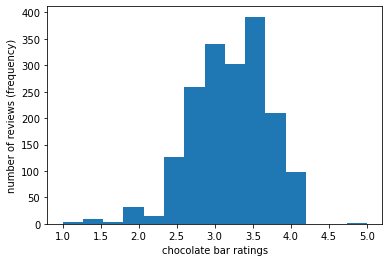

In [7]:
#create a histogram with the ratings data, first sort the data in the ratings list:
#ratings.sort()

#plot the data using matplot
plt.hist(ratings, density=False, bins=15)
plt.xlabel('chocolate bar ratings')
plt.ylabel('number of reviews (frequency)')
plt.show()




## Which chocolatier makes the best chocolate?

9. We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

   First, let's find all tags on the webpage that contain the company names.

In [8]:
#here we are creating a list out of the 'ratings' column of data in the table
comp = soup.find_all(attrs={'class':'Company'})
#print(comp)

10. Just like we did with ratings, we now want to make an empty list to hold company names.

In [9]:
company = []




11. Loop through the tags containing the company names, and add the text from each tag to the list you just created.

In [10]:
for item in comp:
    #print(item)
    company.append(item.get_text())
#remove first item from the list
company.pop(0)
print(len(company))
print(len(ratings_unsorted))


1795
1795


12. Create a DataFrame with a column "Company" corresponding to your companies list, and a column "Ratings" corresponding to your ratings list.

In [11]:
#create dictionary of combining the two lists and creating a numerical 'key' value that is unique as the lists
#contain duplicates
data = {}
for num in range(0,1795):
    data[num] = {"Company": company[num],"Rating": ratings_unsorted[num]}
#print(data)   

#create dataframe
df = pd.DataFrame.from_dict(data, orient="index")
#print(df)


13. Use `.grouby` to group your DataFrame by Company and take the average of the grouped ratings.

    Then, use the `.nlargest` command to get the 10 highest rated chocolate companies. Print them out.
    
    Look at the hint if you get stuck on this step!

In [12]:
#applying group by on 'Company'
grouped_df = df.groupby("Company")
#calculate the mean rating for each company
mean_df = grouped_df.mean("Rating")
#print(mean_df)
#reset the index of the dataframe with numerical value (either with this or without is ok for this project)
mean_df = mean_df.reset_index()
#print(mean_df)

top_10 = mean_df.nlargest(10, "Rating")
print(top_10)




                                  Company    Rating
380                Tobago Estate (Pralus)  4.000000
183  Heirloom Cacao Preservation (Zokoko)  3.875000
287                                Ocelot  3.875000
14                                 Amedei  3.846154
249                                Matale  3.812500
304                                Patric  3.791667
191                     Idilio (Felchlin)  3.775000
2                                  Acalli  3.750000
82                             Chocola'te  3.750000
96           Christopher Morel (Felchlin)  3.750000


## Is more cacao better?

14. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

    It looks like the cocoa percentages are in the table under the Cocoa Percent column (note we are looking at cocoa not cocao!)
    
    Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as a float, after stripping off the `%` character.

In [13]:
#here we are creating a list out of the 'cocoa percentage' column of data in the table
cocoa = soup.find_all(attrs={'class':'CocoaPercent'})
coco = []
for item in cocoa:
     coco.append(item.get_text())          
#remove first item from the list
coco.pop(0)
print(len(coco))
#print(coco)


1795


In [14]:
#convert values in the list from strings to float and create a new list for this 'clean' data
coco_data = []
for item in coco:
    remove_percent = item.replace('%','')
    coco_data.append(float(remove_percent))
#print(coco_data)    

15. Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

In [15]:
#Adding more data to the dataframe
df['CocoaPercentage'] = coco_data
#print(df)

16. Make a scatterplot of ratings (`your_df.Rating`) vs percentage of cocoa (`your_df.CocoaPercentage`).

    You can do this in Matplotlib with these commands:
    
```py
plt.scatter(df.CocoaPercentage, df.Rating)
plt.show()
```

Call `plt.clf()` to clear the figure between showing your histogram and this scatterplot.

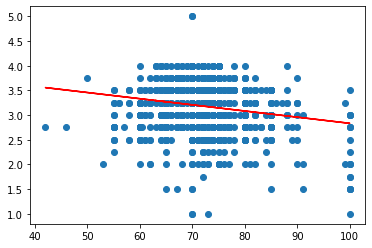

In [16]:
plt.clf()    #not really sure why I need to do this as it doesn't impact by scatterplot
plt.scatter(df.CocoaPercentage, df.Rating)
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
plt.show()


17. Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

    Copy this code and paste it after you create the scatterplot, but before you call `.show()`:
    
```py
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
```

Interestingly, the line of best fit is sloping downwards, implying that as the cocoa percentage increases, the rating falls.
There is quite an even distribution of ratings across all cocoa percentages, high cocoa seem to have attracted high and low
ratings. 



## Explore!

18. We have explored a couple of the questions about chocolate that inspired us when we looked at this chocolate table.

    What other kinds of questions can you answer here? Try to use a combination of BeautifulSoup and Pandas to explore some more.
    
    For inspiration: Where are the best cocoa beans grown? Which countries produce the highest-rated bars?

In [17]:
#here we are creating a list out of the 'company location' data
comp_loc = soup.find_all(attrs={'class':'CompanyLocation'})
comploc = []
for item in comp_loc:
     comploc.append(item.get_text())          
#remove first item from the list
comploc.pop(0)
print(len(comploc))

#here we are creating a list out of the 'cocoa bean origin' data
bean_origin = soup.find_all(attrs={'class':'BroadBeanOrigin'})
bean_orig = []
for item in bean_origin:
     bean_orig.append(item.get_text())          
#remove first item from the list
bean_orig.pop(0)
print(len(bean_orig))
#print(bean_orig)

#add these two new lists of data to the dataframe


1795
1795


In [18]:
df['Company_Location'] = comploc
df['Bean_Origin'] = bean_orig
#print(df)

In [19]:
#QUESTION: WHERE ARE THE BEST BEANS GROWN?
#print(df)

#applying group by on 'Bean_Origin'
grouped_df_bean = df.groupby("Bean_Origin")

#calculate the mean rating for each Country of Bean Origincompany
mean_df_bean = grouped_df_bean.mean("Rating")
#print(mean_df_bean)

print("Here are the top 5 countries of bean origin by rating:")
print()
top_5 = mean_df_bean.nlargest(5, "Rating")
print(top_5)

Here are the top 5 countries of bean origin by rating:

                              Rating  CocoaPercentage
Bean_Origin                                          
Dom. Rep., Madagascar            4.0             70.0
Gre., PNG, Haw., Haiti, Mad      4.0             70.0
Guat., D.R., Peru, Mad., PNG     4.0             88.0
Peru, Dom. Rep                   4.0             67.0
Ven, Bolivia, D.R.               4.0             70.0


In [20]:
#QUESTION: WHERE ARE THE BEST CHOCOLATE BARS PRODUCED?

#applying group by on 'Company Location'
group_df_country = df.groupby("Company_Location")

#calculate the mean rating by Company (that produces the chocolate)
mean_df_country = group_df_country.mean("Rating")

#print(mean_df_country)
print("Here are the top 5 countries that Produce the chocolate bars by average rating:")
print()
top_5 = mean_df_country.nlargest(5, "Rating")
print(top_5)

Here are the top 5 countries that Produce the chocolate bars by average rating:

                    Rating  CocoaPercentage
Company_Location                           
Chile             3.750000        70.000000
Amsterdam         3.500000        73.250000
Netherlands       3.500000        70.000000
Philippines       3.500000        65.000000
Iceland           3.416667        68.666667
